In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
y_train.shape

(60000,)

In [6]:
from keras.layers import Conv2D, Activation,MaxPool2D, Flatten, Dense
from keras.models import Sequential

model=Sequential()
img_shape=(28,28,1)
model.add(Conv2D(filters=6,
                kernel_size=3,
                strides=1,
                padding='valid',
                input_shape=img_shape))

#Tambien se puede usar
#####model.add(Conv2D(6,3,input_shape=img_shape))

model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2,
                   strides=None,
                   padding='valid'))
#tambien se puede usar
###model.add(MaxPool2D(2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0

2023-01-15 20:38:23.781278: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [8]:
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

2023-01-15 20:38:24.059618: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0335 - acc: 0.8448 - val_loss: 0.1996 - val_acc: 0.9388
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1532 - acc: 0.9544 - val_loss: 0.1141 - val_acc: 0.9666
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1033 - acc: 0.9692 - val_loss: 0.0885 - val_acc: 0.9732
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0821 - acc: 0.9754 - val_loss: 0.0766 - val_acc: 0.9759
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0704 - acc: 0.9783 - val_loss: 0.0793 - val_acc: 0.9771


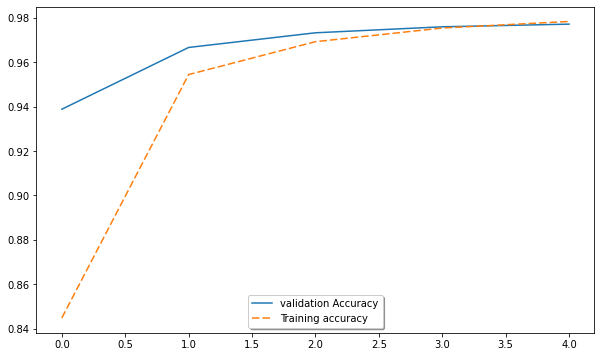

In [9]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(10,6))
gen=ax.plot(history.history['val_acc'],label='validation Accuracy')
fr=ax.plot(history.history['acc'],dashes=[5,2],label='Training accuracy')

legend=ax.legend(loc='lower center',shadow=True)
plt.show()

In [10]:
from tensorflow.keras.optimizers import SGD, Adam
#momentum
momentum_optimizer = SGD(learning_rate=0.01,momentum=0.9)

In [11]:
model.compile(optimizer=momentum_optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [12]:
#Adam
adam_optimizer=Adam(lr=0.1,beta_1=0.9,beta_2=0.999,epsilon=1e-08)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
model.compile(optimizer=adam_optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [14]:
#regularizacion
from keras.regularizers import l2

# Set up model
model = Sequential()
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10,bias_regularizer=l2(0.01)))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [16]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 126.6261 - acc: 0.6341 - val_loss: 2.8282 - val_acc: 0.7565
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7423 - acc: 0.7751 - val_loss: 1.1967 - val_acc: 0.8171
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0150 - acc: 0.8310 - val_loss: 0.8404 - val_acc: 0.8600
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7569 - acc: 0.8643 - val_loss: 0.6656 - val_acc: 0.8778
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6046 - acc: 0.8891 - val_loss: 0.5206 - val_acc: 0.9098
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4808 - acc: 0.9118 - val_loss: 0.4890 - val_acc: 0.9106
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4005 - acc: 0.9266 - val_loss: 0.3468 - val_acc: 0.9425
Epoch 8/10
1875/1875 [==============================] - 9s 

In [17]:
#dropout
from keras.layers import Dropout


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [19]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7497 - acc: 0.7249 - val_loss: 0.2089 - val_acc: 0.9391
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2773 - acc: 0.9122 - val_loss: 0.1104 - val_acc: 0.9662
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1864 - acc: 0.9414 - val_loss: 0.0754 - val_acc: 0.9758
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1464 - acc: 0.9538 - val_loss: 0.0747 - val_acc: 0.9759
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1295 - acc: 0.9597 - val_loss: 0.0607 - val_acc: 0.9790
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1229 - acc: 0.9627 - val_loss: 0.0638 - val_acc: 0.9798
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1167 - acc: 0.9635 - val_loss: 0.0575 - val_acc: 0.9812
Epoch 8/10
1875/1875 [==============================] - 10s 

In [20]:
#Batchnorm
from keras.layers import BatchNormalization


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [22]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2164 - acc: 0.9358 - val_loss: 0.0770 - val_acc: 0.9755
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0718 - acc: 0.9780 - val_loss: 0.0616 - val_acc: 0.9793
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0566 - acc: 0.9828 - val_loss: 0.0511 - val_acc: 0.9832
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0475 - acc: 0.9854 - val_loss: 0.0486 - val_acc: 0.9825
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0426 - acc: 0.9870 - val_loss: 0.0515 - val_acc: 0.9827
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0451 - val_acc: 0.9860
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0464 - val_acc: 0.9847
Epoch 8/10
1875/1875 [==============================] -

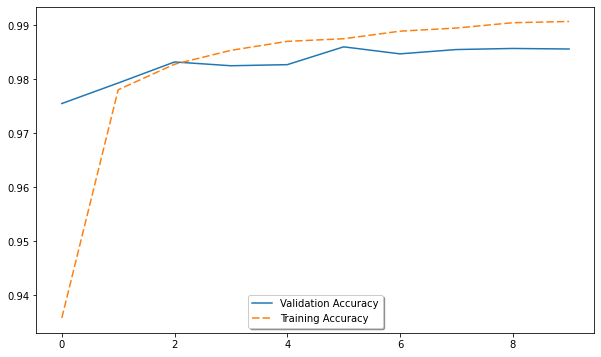

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()